# types of missing data 
#1.Missing completely at  Random(MCAR)
2.Missing Not a Random(MNAR)
3.Missing at Random(MAR)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
df=pd.read_csv(r'C:\Users\rohit\Downloads\Smash (6)\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
#missing competely at random(MCAR)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [52]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_null       0
Age_median       0
dtype: int64

In [18]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing Not a Random(MNAR)

In [19]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

df['cabin_null'].mean()

0.7710437710437711

# 

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [21]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Misssing at random

In [23]:
#men---hide their salary
#womren--hide their age

#handling missing values techniques
1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation
Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [71]:
df=pd.read_csv(r'C:\Users\rohit\Downloads\Smash (6)\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()



,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [72]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [65]:
def  impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [66]:
median=df.Age.median()
median

28.0

In [67]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [68]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [49]:
#import matplotlib.pyplot as plt
%matplotlib inline

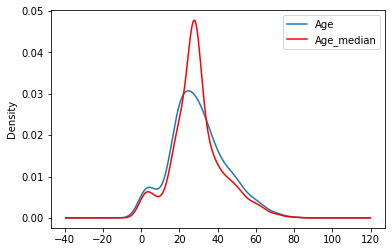

In [69]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

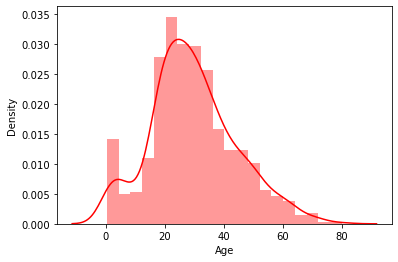

In [73]:
sns.distplot(a=df['Age'],
    
   
    color='red',
    axlabel=None,
    label=None,
    ax=None,
    x=None,)

7th_april_2021

#End of distribution

In [75]:
df=pd.read_csv(r'C:\Users\rohit\Downloads\Smash (6)\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

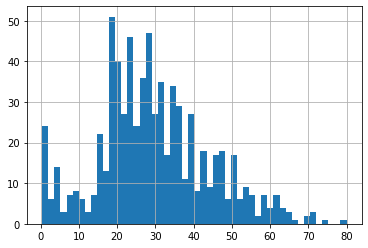

In [76]:
df.Age.hist(bins=50)

In [77]:
extreme=df.Age.mean()+3*df.Age.std()

In [78]:
extreme

73.27860964406095

In [79]:
import seaborn as sns

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

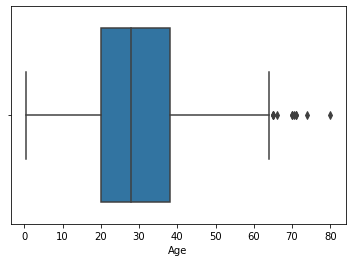

In [80]:
sns.boxplot('Age',data=df)

In [81]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_ditribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [84]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [86]:
df.head()

,Survived,Age,Fare,Age_end_ditribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_ditribution'>

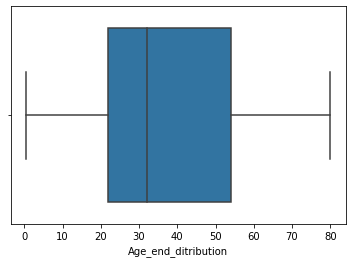

In [87]:
sns.boxplot("Age_end_ditribution",data=df)

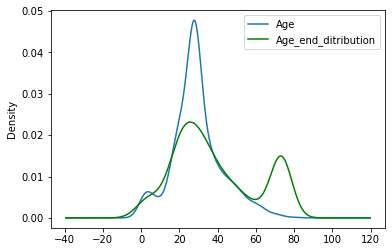

In [90]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_ditribution.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [105]:
df=pd.read_csv(r'C:\Users\rohit\Downloads\house-prices-advanced-regression-techniques\train.csv',usecols=['GarageQual','BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType,GarageQual
0,Gd,NaN,Attchd,TA
1,Gd,TA,Attchd,TA
2,Gd,TA,Attchd,TA
3,TA,Gd,Detchd,TA
4,Gd,TA,Attchd,TA


In [106]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'GarageQual'], dtype='object')

In [107]:
df.shape

(1460, 4)

In [108]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
GarageQual      81
dtype: int64

In [109]:
df.isnull().mean().sort_values(ascending=True)

BsmtQual       0.025342
GarageType     0.055479
GarageQual     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

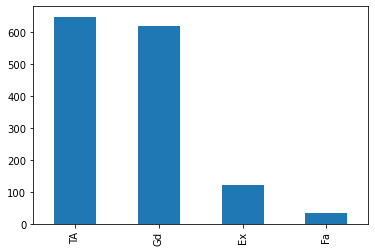

In [111]:
df['BsmtQual'].value_counts().plot.bar()

In [113]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [114]:
df['GarageType'].mode()[0]

'Attchd'

In [115]:
def imput_nan(df,variable):
    msot_frequent_categeory=df[variable].mode()[0]
    df[variable].fillna(msot_frequent_categeory,inplace=True)

In [117]:
for feature  in ['GarageQual','BsmtQual','FireplaceQu','GarageType']:
    imput_nan(df,feature)

In [118]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
GarageQual     0.0
dtype: float64